# Modelamiento del problema de control óptimo

Se busca maximizar la ganancia total obtenida de la pesca de ambas especies en un dominio temporal $[0,T]$ la cual se modela mediante
$$
J = \int_0^T (p_1x(t) + p_2y(t) - c)E(t) e^{-\delta t} dt
$$
donde $p_1$ y $p_2$ son los precios por unidad de biomasa de las especies presa y depredadora respectivamente, $c$ es el costo de pesca por unidad de esfuerzo, y $\delta$ es la tasa de descuento (intereses).
Entonces, el problema de control óptimo queda planteado como:
$$
\min_{E \in \mathcal{U}} - J(x_0, y_0, E)
$$
con $U=[0, E_{max}]$ sujeto a la dinámica del sistema anterioremente definida:
$$
\begin{cases}
    \dot x = rx(1-\frac{x}{K}) - axy-q_1xE\\
    \dot y = abxy-my-q_2yE\\
    x(0) = x_0\\
    y(0) = y_0
\end{cases}
$$
Ya que no hay restricciones sobre el estado final, el conjunto objetivo es $\tau = {T} \times \mathbb{R}_+^2$. Definimos el conjunto de controles admisibles como
$$
\mathcal{U} = \{ E(t) \in L^\infty ([0,T]; U) \mid t(E) \gt T \}
$$

Ya que el problema a trabajar es uno de Lagrange con $\ell = -(p_1 x(t) + p_2 y(t)-c) E(t) e^{-\delta t}$, por lo que el Hamiltoniano queda definido como:
$$
H = -(p_1 x + p_2 y - c) E e^{-\delta t} + s_1 [rx(1-\frac{x}{K}) - axy - q_1 x E] + s_2 [abxy - my - q_2 y E]
$$
con $s = (s_1, s_2)$ el vector de co-estados
$$
\begin{cases}
    \dot s_1 = -\frac{\partial H}{\partial x} =  p_1 E e^{-\delta t} - s_1 [r(1-\frac{2x}{K}) - ay - q_1 E] - s_2 ab y\\
    \dot s_2 = -\frac{\partial H}{\partial y} = p_2 E e^{-\delta t} + s_1 a x - s_2 [ab x - m - q_2 E]
\end{cases}
$$
con las condiciones de transversalidad veamos si se pueden obtener más datos, en este caso como no hay restricciones sobre el estado final, se tiene que $d_{x_f} \in \mathbb{R}$, mientras que como $x_{t_0}$, $t_f$ y $t_0$ son fijos, entonces $d_{x_0} = 0$, $d_{t_f} = 0$ y $d_{t_0} = 0$, por esto estudiemos primero dg para luego ver como quedan las condiciones de transversalidad:

$$
 dg = \frac{\partial g}{\partial x_0} d_{x_0} + \frac{\partial g}{\partial t_0} d_{t_0} + \frac{\partial g}{\partial x_f} d_{x_f} + \frac{\partial g}{\partial t_f} d_{t_f} = \frac{\partial g}{\partial x_f} d_{x_f}
$$

Pero, como $g(x_f) = 0$ puesto que se tiene un problema de lagrange, entonces solo resta estudiar los otros terminos que aparecen en las condiciones de transversalidad:
$$
dg + [\Theta(t_i)dt_i - s(t_i)^Tdt_i]^{t_f}_{t_0} = 0
$$

En este caso se tiene igualdad, dado que B' es un espacio vectorial, por lo que se puede escribir como:
$$
\begin{align*}
    dg + [\Theta(t_i)dt_i - s(t_i)^Tdx_{t_i}]^{t_f}_{t_0} &= 0*d_{x_f} + \Theta(t_f)dt_f - s(t_f)^Tdx_{t_f} - \Theta(t_0)dt_0 - s(t_0)^Tdx_{t_0} = 0\\
    0 &= \Theta(t_f)*0 + s(t_f)^Tdx_f - \Theta(t_0)*0 - s(t_0)^T*0 \\
    0 &= s(t_f)^Tdx_f\\
\end{align*}
$$
Como $d_{x_f} \in \mathbb{R}$, entonces se tiene que $s(t_f) = 0$, por lo que las condiciones de transversalidad quedan como:
$$
\begin{align*}
    s(t_f) &= 0\\
\end{align*}
$$
Con esto, por el problema se conoce $x_0$ y además $s(t_f) = 0$, con ello podemos implementar el método de tiro para resolver el problema de control óptimo.

Tenemos que el control $E(t)$ es tal que minimiza el hamiltoniano, por lo que para casi todo tiempo $t \in [0,T]$ se cumple:
$$
E(t) \in \arg \min_{E \in U} H(x(t), y(t), s(t), E, t)
$$
matraqueando el hamiltoniano se obtiene:
$$
\begin{align*}
    \arg \min_{E \in U} H(x(t),y(t),s(t),E,t) &= \arg \min_{E \in U} \left( -(p_1 x(t) + p_2 y(t) - c) E e^{-\delta t} - s_1(t) q_1 x(t) E - s_2(t) q_2 y(t) E \right)\\
    &= \arg \min_{E \in U} \left( -(p_1x+p_2y-c)e^{-\delta t} - s_1 q_1 x  - s_2 q_2 y\right) E
\end{align*}
$$
Ya que el control es acotado y no negativo, este obedece:
$$
\begin{align*}
E^*(t) &=
\begin{cases}
    E_{\text{max}} & \text{si } \phi(t) < 0\\
    0 & \text{si } \phi(t) > 0\\
    \text{indeterminado} & \text{si } \phi(t) = 0
\end{cases},\\
\phi(t) &=  -(p_1x(t)+p_2y(t)-c)e^{-\delta t} - s_1(t) q_1 x(t)  - s_2(t) q_2 y(t)
\end{align*}
$$
En forma de función indicatriz:
$$
E^*(t) = E_{\text{max}} \cdot \mathbb{1}_{\{\phi(t) < 0\}}(t)
$$

# Simulaciones numéricas, validación del modelo y análisis de la dinámica óptima
## OptimalControl.jl

In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `c:\Users\maty\PycharmProjects\pescado-controlado`


In [2]:
using OptimalControl
using Optim
using DifferentialEquations
using Plots
using LaTeXStrings
using NLPModelsIpopt

In [3]:
# Parámetros biológicos
r = 1.0      # Mayor crecimiento
K = 1.0      # Capacidad de carga normalizada
m = 0.2      # Mortalidad moderada
b = 0.7      # Eficiencia realista
a = 0.3      # Interacción significativa

# Parámetros de captura
q1 = 0.2     # Capturabilidad moderada
q2 = 0.4     # Depredadores más vulnerables

# Control
E_max = 1.5  # Puede exceder 1 para compensar crecimiento

# Parámetros económicos
p1 = 1.0     # Precio normalizado
p2 = 5.0     # Depredador más valioso
c = 0.6     # Costo significativo
δ = 0.05

# Condiciones iniciales
x0 = 0.8     # Cerca de capacidad de carga
y0 = 0.3     # Población moderada

T = 10.0      # Horizonte de tiempo extendido

10.0

In [4]:
ocp = @def begin
    t ∈ [0.0, T], time
    z = (x, y) ∈ R^2, state
    E ∈ R, control
    0 ≤ E(t) ≤ E_max
    
    z(0) == [x0, y0]
    z(t) >= [0.0, 0.0]
    ∂(z)(t) == [r*x(t)*(1 - x(t)/K) - a*x(t)*y(t) - q1*E(t)*x(t),
                b*a*x(t)*y(t) - m*y(t) - q2*E(t)*y(t)]
    
    ∫(exp(-δ*t) * (-p1*x(t) - p2*y(t) + c)*E(t)  ) → min
end

Abstract definition:

    t ∈ [0.0, T], time
    z = ((x, y) ∈ R ^ 2, state)
    E ∈ R, control
    0 ≤ E(t) ≤ E_max
    z(0) == [x0, y0]
    z(t) >= [0.0, 0.0]
    (∂(z))(t) == [(r * x(t) * (1 - x(t) / K) - a * x(t) * y(t)) - q1 * E(t) * x(t), (b * a * x(t) * y(t) - m * y(t)) - q2 * E(t) * y(t)]
    ∫(exp(-δ * t) * ((-p1 * x(t) - p2 * y(t)) + c) * E(t)) → min

The (non autonomous) optimal control problem is of the form:

    minimize  J(z, E) = ∫ f⁰(t, z(t), E(t)) dt, over [0.0, 10.0]

    subject to

        ż(t) = f(t, z(t), E(t)), t in [0.0, 10.0] a.e.,

        ϕ₋ ≤ ϕ(z(0.0), z(10.0)) ≤ ϕ₊, 
        x₋ ≤ z(t) ≤ x₊, 
        u₋ ≤ E(t) ≤ u₊, 

    where z(t) = (x(t), y(t)) ∈ R² and E(t) ∈ R.


In [5]:
sol = solve(ocp, grid_size=1000, print_level=5)

▫ This is OptimalControl version v1.1.3 running with: direct, adnlp, ipopt.

▫ The optimal control problem is solved with CTDirect version v0.17.3.

   ┌─ The NLP is modelled with ADNLPModels and solved with NLPModelsIpopt.
   │
   ├─ Number of time steps⋅: 1000
   └─ Discretisation scheme: midpoint

▫ This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:    10002
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     9002

Total number of variables............................:     3002
                     variables with only lower bounds:     2002
                variables with lower and upper bounds:     1000
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2002
Total number of inequality constraints...............:        0
        inequality constraints with only lower 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\maty\\\\AppData\\\\Local\\\\Temp\\\\jl_VOTKXsbEpk\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\maty\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


• Solver:
  ✓ Successful  : true
  │  Status     : first_order
  │  Message    : Ipopt/generic
  │  Iterations : -1
  │  Objective  : -4.5972731403913105
  └─ Constraints violation : Inf

• Boundary duals: [2.01378963388561, 9.968692784683261]


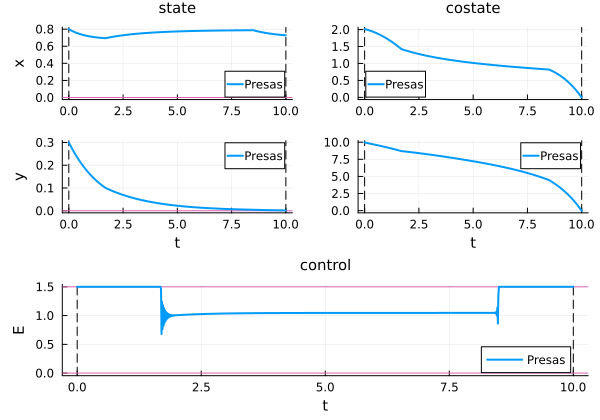

In [6]:
plot(sol, vars=(0, (z->z[1])), label="Presas", xlabel="Tiempo (años)", ylabel="Población", title="Dinámica de Presas y Depredadores bajo Control de Pesca")

In [37]:
s = time_grid(sol)
x_sol = state(sol)
p_sol = costate(sol)
u = control(sol)

x = [x_sol(t)[1] for t in s]
y = [x_sol(t)[2] for t in s]

px = [p_sol(t)[1] for t in s]
py = [p_sol(t)[2] for t in s]

cont = [u(t) for t in s];

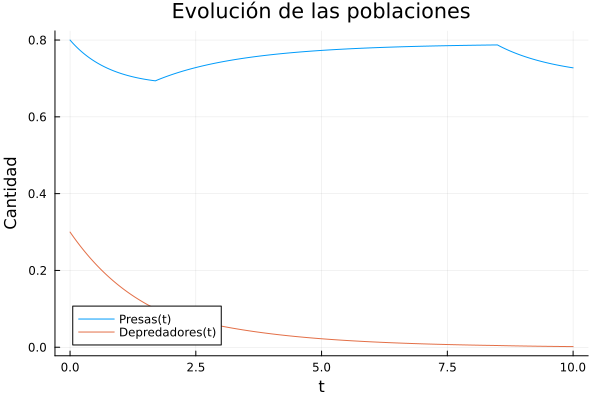

In [39]:
plot(s, x,label = "Presas(t)", xlabel = "t", ylabel = "Cantidad", title = "Evolución de las poblaciones")
plot!(s, y, label = "Depredadores(t)")

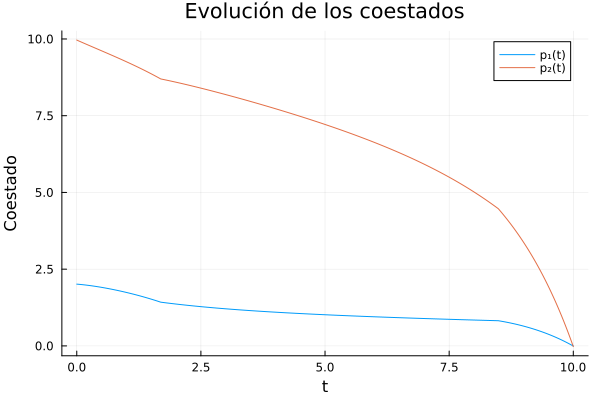

In [40]:
plot(s, px, label = "p₁(t)", xlabel = "t", ylabel = "Coestado", title = "Evolución de los coestados")
plot!(s, py, label = "p₂(t)")

In [74]:
p_control =plot(s, cont, label = "u(t)", xlabel = "Tiempo", ylabel = "Esfuerzo", title = "Esfuerzo en el Tiempo" )
hline!(p_control, [1.5], label = "E_max = 1.5", linestyle=:dash)
hline!(p_control, [0], label = "E_min = 0", linestyle=:dash)
savefig(p_control, "control_optimo.pdf")

"c:\\Users\\maty\\PycharmProjects\\pescado-controlado\\control_optimo.pdf"

In [76]:
x_sol = state(sol)
p_sol = costate(sol)  # co-estados

# Función de conmutación CORRECTA (para minimización)
function phi(t)
    return exp(-δ*t)*(-p1*x_sol(t)[1] - p2*x_sol(t)[2] + c) - p_sol(t)[1]*q1*x_sol(t)[1] - p_sol(t)[2]*q2*x_sol(t)[2]
end
phi_indicator(t) = phi(t) < 0 ? 1.0 : 0.0


# Graficar phi(t)
ts = range(0, T, length=1000)
phis = [phi(t) for t in ts]
inds = [phi_indicator(t) for t in ts]
p_conm = plot(ts, phis, label = "φ(t)", xlabel = "Tiempo", ylabel = "Valor", title = "Función de conmutación φ(t)")
#plot!(p_conm, ts, inds, label = "Indicadora 1_{φ<0}", lw=2)
hline!(p_conm, [0], label="φ = 0", linestyle=:dash)
savefig(p_conm, "conmutación_control.pdf")

"c:\\Users\\maty\\PycharmProjects\\pescado-controlado\\conmutación_control.pdf"

Con ello, podemos de forma analítica plantear el control óptimo para el problema planteado, sin embargo, para comparar con el obtenido de OptimalControl.jl.

In [9]:
s = time_grid(sol)
x = state(sol)
p = costate(sol)

#103 (generic function with 1 method)

In [10]:
J = 0.0
for i in 1:(length(s)-1)
    t_i = s[i]
    E_i = E_max*phi_indicator(t_i)
    dt = s[i+1] - t_i
       
    ingreso = exp(-δ*t_i) * (c - p1*x(i)[1] - p2*x(i)[2]) * E_i
    J += ingreso * dt
end
-J

-137.11991513789195

En control obtenido por la librería OptimalControl.jl no respeta las condiciones de optimalidad obtenidas por PMP, por lo que se procede a probar el modelo obtenido implementando la dinámica usando diferentialequations.jl y comparando los resultados.
## Solución del PMP

In [11]:
# Función de control bang-bang
function control_bang_bang(x, y, s1, s2, t)
    φ = exp(-δ*t)*(c - p1*x - p2*y) - s1*q1*x - s2*q2*y
    return φ < 0 ? E_max : 0.0
end

# Sistema aumentado
function sistema_aumentado!(du, u, p, t)
    x, y, s1, s2 = u
    
    E = control_bang_bang(x, y, s1, s2, t)
    
    # Dinámica de estados
    du[1] = r*x*(1 - x/K) - a*x*y - q1*E*x
    du[2] = b*a*x*y - m*y - q2*E*y
    
    # Dinámica de co-estados CORREGIDA
    du[3] = (exp(-δ*t)*p1*q1*E - s1*(r*(1-2x/K) - a*y - q1*E) - s2*(b*a*y))
    
    du[4] =  (exp(-δ*t)*p2*q2*E + s1*(-a*x) - s2*(b*a*x - m - q2*E))
end

sistema_aumentado! (generic function with 1 method)

In [12]:
# Función objetivo para OPTIMIZAR: -J 
function objetivo_shooting(p0_guess)
    s1_0, s2_0 = p0_guess
    
    u0 = [x0, y0, s1_0, s2_0]
    prob = ODEProblem(sistema_aumentado!, u0, (0.0, T))
    sol = solve(prob, Tsit5(), saveat=0.01)
      
    # Condiciones terminales (penalización)
    s1_T, s2_T = sol.u[end][3], sol.u[end][4]
    error_terminal = s1_T^2 + s2_T^2
    
    # QUEREMOS MAXIMIZAR J ⇔ MINIMIZAR -J
    # Y que error_terminal ≈ 0
    return error_terminal 
end


objetivo_shooting (generic function with 1 method)

Co-estados iniciales óptimos: s1(0) = -0.530156003215985, s2(0) = -4.445203154735603
Beneficio óptimo J = -4.4210957518496965


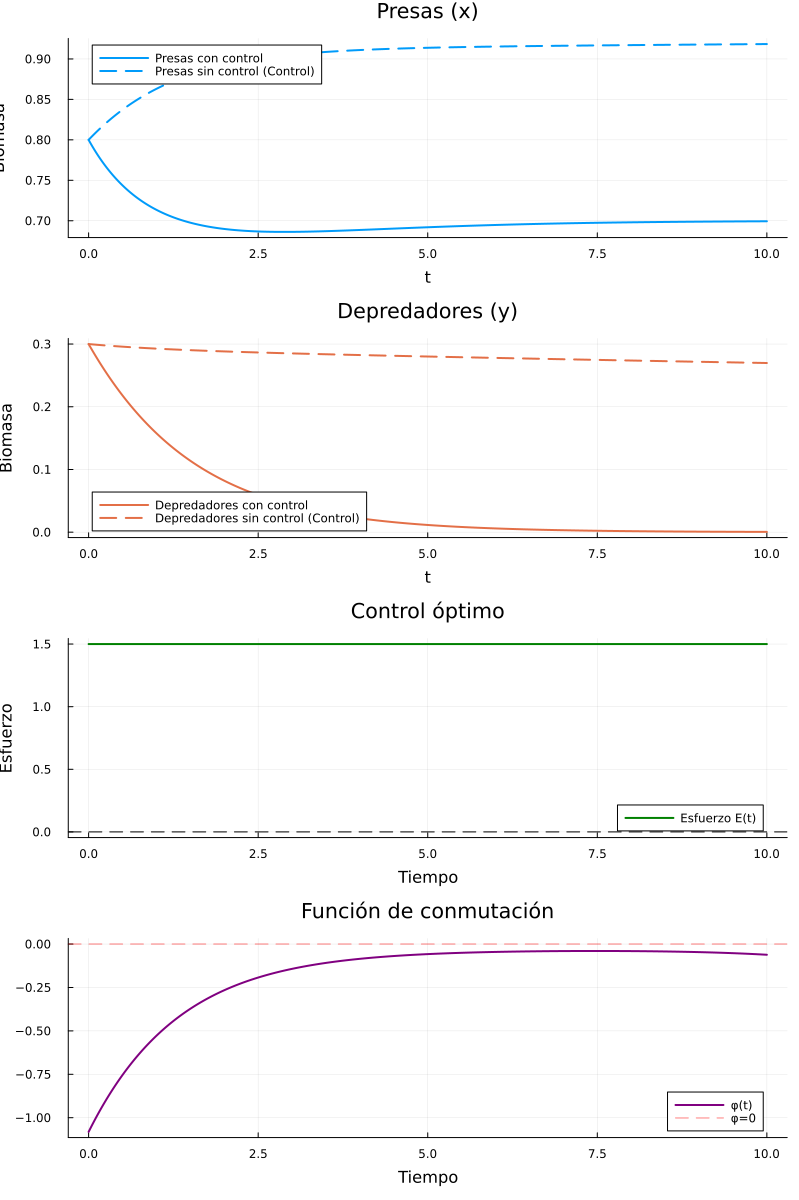

In [69]:

# Optimización
result = optimize(objetivo_shooting, [0.0, 0.0], LBFGS())
p0_opt = Optim.minimizer(result)
println("Co-estados iniciales óptimos: s1(0) = $(p0_opt[1]), s2(0) = $(p0_opt[2])")

# Simulación con control óptimo
u0_opt = [x0, y0, p0_opt[1], p0_opt[2]]
prob_opt = ODEProblem(sistema_aumentado!, u0_opt, (0.0, T))
sol_opt = solve(prob_opt, saveat=0.01)

t = sol_opt.t
x_opt = [u[1] for u in sol_opt.u]
y_opt = [u[2] for u in sol_opt.u]
s1 = [u[3] for u in sol_opt.u]
s2 = [u[4] for u in sol_opt.u]

E_opt = [control_bang_bang(x_opt[i], y_opt[i], s1[i], s2[i], t[i]) for i in 1:length(t)]

# Calcular J para esta solución
J_opt = 0.0
for i in 1:(length(t)-1)
    ingreso = exp(-δ*t[i]) * (c - p1*x_opt[i] - p2*y_opt[i]) * E_opt[i]
    J_opt += ingreso * (t[i+1] - t[i])
end
println("Beneficio óptimo J = ", J_opt)

# Simulación SIN control (E=0)
function sistema_sin_control!(du, u, p, t)
    x, y = u
    du[1] = r*x*(1 - x/K) - a*x*y
    du[2] = b*a*x*y - m*y
end

u0_sin = [x0, y0]
prob_sin = ODEProblem(sistema_sin_control!, u0_sin, (0.0, T))
sol_sin = solve(prob_sin, saveat=0.01)

x_sin = [u[1] for u in sol_sin.u]
y_sin = [u[2] for u in sol_sin.u]

# Calcular φ(t) para ver el switching function
ϕ = [exp(-δ*t[i])*(c - p1*x_opt[i] - p2*y_opt[i]) - 
     s1[i]*q1*x_opt[i] - s2[i]*q2*y_opt[i] for i in 1:length(t)]

# Gráficos
p6 = plot(t, x_opt, label="Presas con control", linewidth=2, color=1)
plot!(t, x_sin, label="Presas sin control (Control)", linestyle=:dash, linewidth=2, color=1)
xlabel!("t"); ylabel!("Biomasa")
title!("Presas (x)")

p7 = plot(t, y_opt, label="Depredadores con control", linewidth=2, color=2)
plot!(t, y_sin, label="Depredadores sin control (Control)", linestyle=:dash, linewidth=2, color=2)
xlabel!("t"); ylabel!("Biomasa")
title!("Depredadores (y)")

p8 = plot(t, E_opt, label="Esfuerzo E(t)", linewidth=2, color=:green)
xlabel!("Tiempo"); ylabel!("Esfuerzo")
hline!([0], label="", color=:black, linestyle=:dash)
title!("Control óptimo")

p9 = plot(t, ϕ, label="φ(t)", linewidth=2, color=:purple)
hline!([0], label="φ=0", color=:red, linestyle=:dash, alpha=0.5)
xlabel!("Tiempo"); ylabel!("φ(t)")
title!("Función de conmutación")

plot(p6, p7, p8, p9, layout=(4,1), size=(800, 1200), legend=:best)

In [73]:
p8 = plot(t, E_opt, label="Esfuerzo en el Tiempo", linewidth=2, color=:green)
xlabel!("Tiempo"); ylabel!("Esfuerzo")
hline!([0], label="", color=:black, linestyle=:dash)
title!("Control óptimo")
savefig(p8, "control_optimo_pmp.pdf")

"c:\\Users\\maty\\PycharmProjects\\pescado-controlado\\control_optimo_pmp.pdf"

In [75]:
p9 = plot(t, ϕ, label="φ(t)", linewidth=2, color=:purple)
hline!([0], label="φ=0", color=:red, linestyle=:dash, alpha=0.5)
xlabel!("Tiempo"); ylabel!("Valor")
title!("Función de conmutación")
savefig(p9, "funcion_conmutacion_pmp.pdf")

"c:\\Users\\maty\\PycharmProjects\\pescado-controlado\\funcion_conmutacion_pmp.pdf"